In [1]:
%matplotlib inline
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt


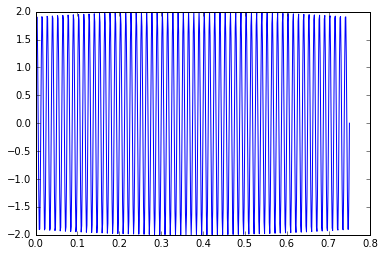

In [17]:
N = 600
# sample spacing
fs=800
f=80
A=2

dt = 1.0 / fs
t = np.linspace(0.0, N*dt, N)
#t=np.arange(0,0.1,dt)

y = A*np.sin( 2.0*np.pi*f*t) 

plt.plot(t,y)

Draw random samples from a normal (Gaussian) distribution.

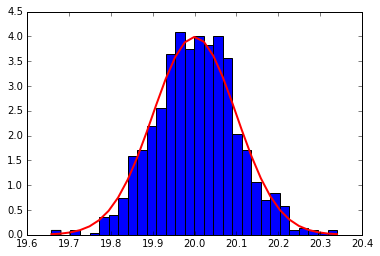

In [36]:
mu, sigma = 20, 0.1
s_gen = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s_gen, 30, normed=True)
#Check with analitical plot
s_an= 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
plt.plot(bins,s_an, linewidth=2, color='r' )


** standard normal distribution** ==> $N(\mu,\sigma^2)$

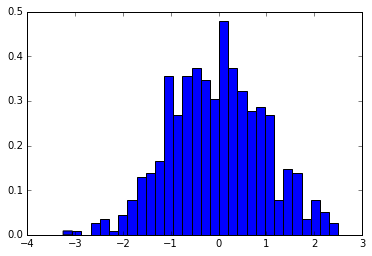

In [53]:
mu, sigma =0, 1
s_gen = mu+sigma*np.random.randn(600)
count, bins, ignored = plt.hist(s_gen, 30, normed=True)


AWGN noise variance = $\sigma_N=\sqrt(N_s\sigma_s^210^{\frac{-E_s/N_0}{10}}/2)$ $X_{R}$

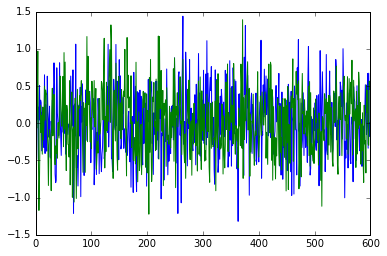

In [55]:

Ns=2#number of samples per symbol (bit)
EsN0=10
var_signal=np.var(y)
w = np.sqrt(Ns*var_signal*10**(-EsN0/10.)/2.)
w *= (np.random.randn(len(y)) + 1j*np.random.randn(len(y)))
plt.plot(w.real)
plt.plot(w.imag)

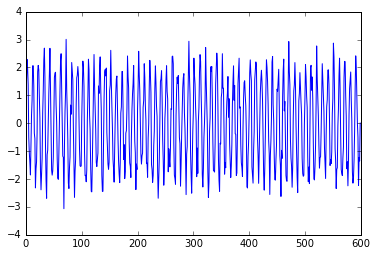

In [56]:
plt.plot(y+w.real)

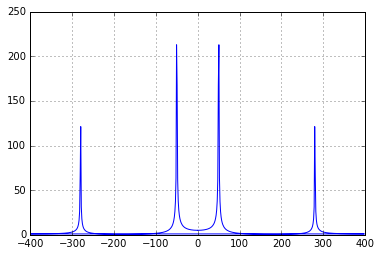

In [8]:
from scipy.fftpack import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
fs=800
dt = 1.0 / fs
t = np.linspace(0.0, N*dt, N)
f1,f2=50,280
y = np.sin(f1* 2.0*np.pi*t) + 0.5*np.sin(f2* 2.0*np.pi*t)
yf = fft(y)
xf =fftfreq(y.size, t[1]-t[0])#np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.plot(xf,  np.abs(yf))#2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

# QAM modulation

[2 1 2 3 1 2 1 3 3 0 3 0 0 1 0 3 0 1 2 1 1 0 0 2 0 1 0 1 2 1 2 0 3 1 0 3 1
 3 3 2]


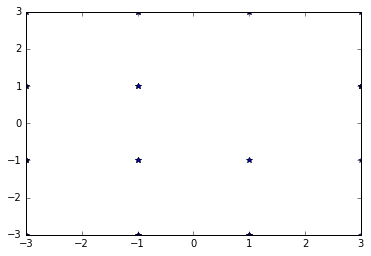

In [21]:
M,N_symb=4,40
xI = np.random.randint(0,M,N_symb)
print(xI)
xI = 2*xI - (M-1)

xQ = np.random.randint(0,M,N_symb)
xQ = 2*xQ - (M-1)




plt.plot(xI,xQ,'*b')
plt.show()



# Chennal


**Large-Scale fading**

***Free-space pathloss model***

$P_r(d)=\frac{P_tG_tG_r\lambda^2}{(4\pi)^2 d^2 L}$

$PL_F(d)[dB]=10\log(\frac{P_t}{P_r})=-20\log\left(\frac{\sqrt(G_tG_r/L)\lambda }{(4\pi)d }\right)$

In [33]:
fc=1e6
Gt=Gr=1
L=1

d=1e3

lam=3e8/fc

t1=lam/(4*np.pi*d)
t2=np.sqrt(Gt*Gr)
PL=-20*np.log10(t1*t2)
print(PL)

32.441772186


In [14]:
def free_space(fc,d,Gt=1,Gr=1,L=1):
    lam=3e8/fc

    t1=lam/(4*np.pi*d)
    t2=np.sqrt(Gt*Gr)
    return -20*np.log10(t1*t2)
    
    

In [26]:
free_space(900e6,2e2)

77.547222288114796

[ 52.44177219  58.4623721   61.98419728  64.48297201  66.42117227
  68.00479719  69.34373299  70.50357193  71.52662237  72.44177219]


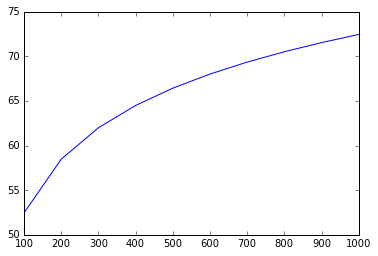

In [37]:

fc=100e6#900e6
PL=np.zeros(10)
dist=np.zeros(10)
i=0
for d in range(1,11):
    dist[i]=d*100
    
    PL[i]=free_space(fc,dist[i])
    
    i=i+1
print(PL)
plt.plot(dist,PL)
plt.show()

**Log-normal path loss model**

$PL(d)[dB]=PL_F(d_0)+10n\log\left(\frac{d}{d_0}\right)+ X_F$ 

In [46]:
def log_normal(fc,d,do,n,sigma):
    lam=3e8/fc

    Xs=sigma*np.random.randn()
    return -20*np.log10(lam/(4*np.pi*do))+10*n*np.log10(d/do)+Xs
    